In [2]:
import pandas as pd
df = pd.read_csv("employee_productivity.csv")

In [3]:
df.head()

,Employee_ID,Name,Department,Hours_Worked_Per_Week,Projects_Completed,Performance_Rating
0,1,Susan Reynolds,IT,23,3,3.7
1,2,Tyler Smith,Finance,20,1,3.7
2,3,Karen Zimmerman,HR,43,6,1.5
3,4,Edward Moore,Marketing,36,2,2.2
4,5,Ruth Booth,Operations,40,9,3.4


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            100 non-null    int64  
 1   Name                   100 non-null    object 
 2   Department             100 non-null    object 
 3   Hours_Worked_Per_Week  100 non-null    int64  
 4   Projects_Completed     100 non-null    int64  
 5   Performance_Rating     100 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


,Employee_ID,Hours_Worked_Per_Week,Projects_Completed,Performance_Rating
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,40.230000,4.240000,3.049000
std,29.011492,11.026007,2.902872,1.130611
min,1.000000,20.000000,0.000000,1.100000
25%,25.750000,31.000000,2.000000,2.100000
50%,50.500000,42.000000,4.000000,3.050000
75%,75.250000,50.000000,7.000000,4.000000
max,100.000000,59.000000,9.000000,5.000000


In [4]:
#Check missing values & duplicates
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
#Create productivity score
df['productivity_score'] = df['Projects_Completed'] / df['Hours_Worked_Per_Week']

In [7]:
df.head()

,Employee_ID,Name,Department,Hours_Worked_Per_Week,Projects_Completed,Performance_Rating,productivity_score
0,1,Susan Reynolds,IT,23,3,3.7,0.130435
1,2,Tyler Smith,Finance,20,1,3.7,0.050000
2,3,Karen Zimmerman,HR,43,6,1.5,0.139535
3,4,Edward Moore,Marketing,36,2,2.2,0.055556
4,5,Ruth Booth,Operations,40,9,3.4,0.225000


In [8]:
#Categorize employee productivity
def productivity_category(score):
    if score < 0.15:
        return "Low Productivity"
    elif score < 0.30:
        return "Average Productivity"
    else:
        return "High Productivity"


df['productivity_category'] = df['productivity_score'].apply(productivity_category)

df[['Employee_ID','productivity_score','productivity_category']].head()

,Employee_ID,productivity_score,productivity_category
0,1,0.130435,Low Productivity
1,2,0.050000,Low Productivity
2,3,0.139535,Low Productivity
3,4,0.055556,Low Productivity
4,5,0.225000,Average Productivity


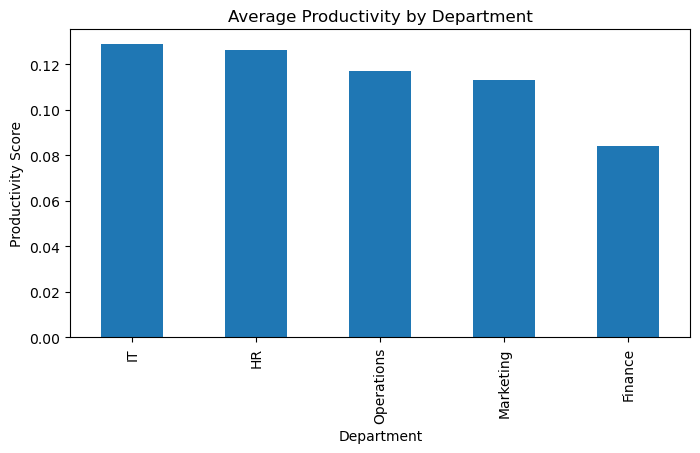

In [9]:
#Productivity by Department
dept_prod =df.groupby('Department')['productivity_score'].mean().sort_values(ascending=False)

dept_prod.plot(kind='bar', figsize=(8,4), title='Average Productivity by Department')
plt.ylabel("Productivity Score")
plt.show()

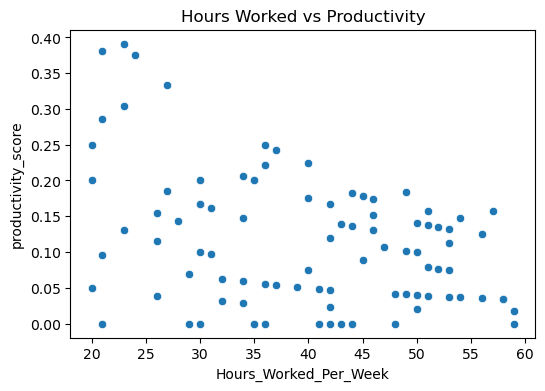

In [11]:
#Hours Worked vs Productivity
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Hours_Worked_Per_Week',
    y='productivity_score',
    data = df
)
plt.title("Hours Worked vs Productivity")
plt.show()

In [13]:
#Create rating group
def rating_group(r):
    if r <= 2 :
        return "Low"
    elif r <= 4:
        return "Medium"
    else:
        return "High"

df['rating_group'] = df['Performance_Rating'].apply(rating_group)

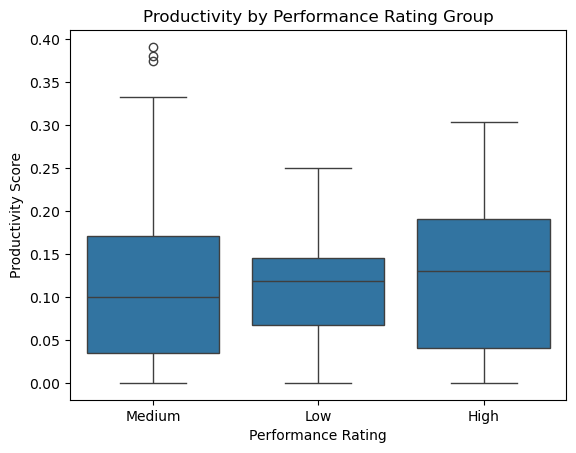

In [15]:
#Performance Rating vs Productivity
sns.boxplot(
    x='rating_group',
    y='productivity_score',
    data = df
)
plt.title("Productivity by Performance Rating Group")
plt.xlabel("Performance Rating")
plt.ylabel("Productivity Score")
plt.show()

In [16]:
#Create risk flags
def productivity_risk(row):
    if row['productivity_score'] < 0.15 :
        return 'Under-utilized'
    elif row['productivity_score']> 0.30 and row['Hours_Worked_Per_Week'] > 45:
        return 'Overworked'
    else:
        return 'Healthy'

df['productivity_risk'] = df.apply(productivity_risk, axis=1)
df['productivity_risk'].value_counts()

productivity_risk
Under-utilized    68
Healthy           32
Name: count, dtype: int64

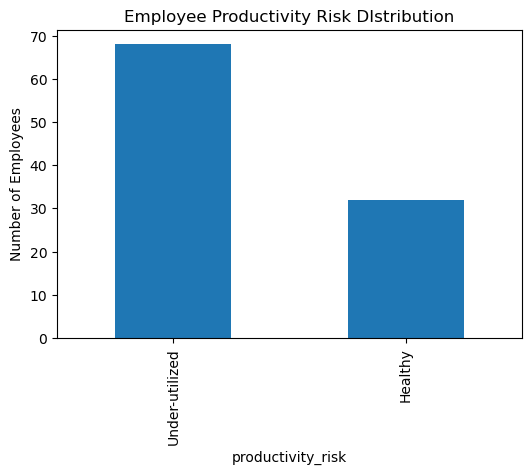

In [17]:
#Analyze productivity risk distribution
#overall risk breakdown
df['productivity_risk'].value_counts().plot(
    kind ='bar',
    title ='Employee Productivity Risk DIstribution',
    figsize=(6,4)
)
plt.ylabel("Number of Employees")
plt.show()

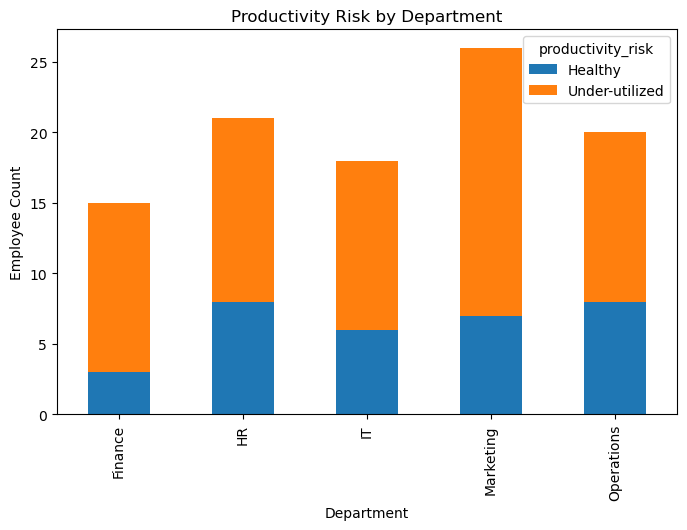

In [19]:
#Risk by department
dept_risk = pd.crosstab(df['Department'], df['productivity_risk'])

dept_risk.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Productivity Risk by Department")
plt.ylabel("Employee Count")
plt.show()

In [20]:
#Identify top-risk employees
risk_employees = df[df['productivity_risk'] != 'Healthy'] \
                    .sort_values(by='productivity_score', ascending=False)

risk_employees[['Employee_ID','Department','Hours_Worked_Per_Week',
                'Projects_Completed','productivity_score','productivity_risk']].head(10)


,Employee_ID,Department,Hours_Worked_Per_Week,Projects_Completed,productivity_score,productivity_risk
99,100,Marketing,54,8,0.148148,Under-utilized
8,9,Marketing,34,5,0.147059,Under-utilized
11,12,HR,28,4,0.142857,Under-utilized
29,30,IT,50,7,0.140000,Under-utilized
79,80,Finance,43,6,0.139535,Under-utilized
2,3,HR,43,6,0.139535,Under-utilized
28,29,Finance,51,7,0.137255,Under-utilized
5,6,Finance,44,6,0.136364,Under-utilized
22,23,HR,52,7,0.134615,Under-utilized
39,40,Operations,53,7,0.132075,Under-utilized


In [21]:
df.to_csv("employee_productivity_cleaned.csv", index=False)